In [216]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as pl
from astropy.io import fits
# import aplpy
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from radio_beam import Beam
from astropy.nddata.utils import Cutout2D
from pvextractor import Path
from pvextractor import extract_pv_slice
from spectral_cube import SpectralCube
from pvextractor import PathFromCenter
from astropy.coordinates import FK5

from matplotlib.colors import ListedColormap

from matplotlib.ticker import MultipleLocator

import numpy as np
import astropy.units as u
from scipy import stats

plt.rcParams.update({"text.usetex": False,
                     "font.family": "serif",
                     'xtick.direction': 'in',
                     'ytick.direction': 'in'})

In [369]:
file_vc_SO = 'Documents/SO/B335_SO_vlsr_5snr_014kms.fits'
file_vc_SO_1st = 'Documents/SO/B335_SO_vlsr_5snr_014kms_1st.fits'
file_vc_SO_2nd = 'Documents/SO/B335_SO_vlsr_5snr_014kms_2nd.fits'
file_vc_SO_3rd = 'Documents/SO/B335_SO_vlsr_5snr_014kms_3rd.fits'





file_vc_N2Hp_thin = 'Documents/B335_N2Hp_vlsr_thin.fits'
file_dv_N2Hp_thin = 'Documents/B335_N2Hp_dv_thin.fits'

file_vc_N2Hp = 'Documents/B335_N2Hp_vlsr.fits'

file_dv_SO = 'Documents/SO/B335_SO_dv_5snr_014kms.fits'
file_dv_N2Hp = 'Documents/B335_N2Hp_dv.fits'
#file_dv_N2Hp = 'Documents/B335_N2Hp_dv_cubedirect.fits'

file_bright_SO = 'Documents/B335_SO_brightness.fits'

file_TdV_SO = 'Documents/SO/B335_SO_mom0.fits'
file_TdV_N2Hp = 'Documents/B335_N2H+_10_v1_Tpeak.fits'
file_TdV_CO = 'Documents/B335_CO_TdV_smoothed.fits'
file_TdV_CO_2016 = 'Documents/B335_CO_TdV_2016.fits'

file_TdV_C18O = 'Documents/C18O/B335_C18O_mom0.fits'
file_vc_C18O = 'Documents/C18O/B335_C18O_vlsr_01kms_5snr.fits'
file_dv_C18O = 'Documents/C18O/B335_C18O_dv_01kms_5snr.fits'

file_vc_H13CO_blueshift = 'Documents/H13CO/B335_H13CO_32_vlsr_5snr_blueshift.fits'
file_dv_H13CO_blueshift = 'Documents/H13CO/B335_H13CO_32_dv_5snr_blueshift.fits'
file_dv_H13CO_width_red = 'Documents/H13CO/B335_H13CO_32_vlsr_5snr_width_red.fits'
file_dv_H13CO_width_blue = 'Documents/H13CO/B335_H13CO_32_vlsr_5snr_width_blue.fits'
file_vc_H13CO_vlsr_red = 'Documents/H13CO/B335_H13CO_32_vlsr_5snr_vel_red.fits'
file_vc_H13CO_vlsr_blue = 'Documents/H13CO/B335_H13CO_32_vlsr_5snr_vel_blue.fits'

file_TdV_H13CO = 'Documents/H13CO/B335_H13C0_32_mom0.fits'
file_vc_H13CO = 'Documents/H13CO/B335_H13CO_32_vlsr_1comp_5snr.fits'
file_dv_H13CO = 'Documents/H13CO/B335_H13CO_32_dv_1comp_5snr.fits'

file_vc_H13CO_redshift = 'Documents/H13CO/B335_H13CO_32_vlsr_5snr_redshift.fits'
file_dv_H13CO_redshift = 'Documents/H13CO/B335_H13CO_32_dv_5snr_redshift.fits'

file_vc_CS = 'Documents/CS/B335_CS_vlsr_5snr.fits'
file_dv_CS = 'Documents/CS/B335_CS_dv_3snr.fits'
file_TdV_CS = 'Documents/CS/B335_CS_mom0_smoothed.fits'

file_cont_band3 = 'Documents/B335_cont_Band3.fits'
file_cont_band5 = 'Documents/B335_cont_Band5.fits'
file_cont_band6 = 'Documents/B335_cont_Band6.fits'
file_cont_band7 = 'Documents/B335_cont_Band7.fits'

file_cont = 'Documents/B335_cont.fits'

file_yso = 'Documents/B335.txt'

#ra0 = 044.9301
#dec0 = -06.5586
#width = 0.1010000
#height = 0.1150000

position = SkyCoord("19h37m0.9s","7d34m9.6s")
#position = SkyCoord(ra0 * u.deg, dec0 * u.deg, frame='fk5')
#cutout_size_SO = u.Quantity((2.0, 2.0), u.arcsec)
cutout_size_SO = u.Quantity((3.5, 3.5), u.arcsec)

cutout_size_CS = u.Quantity((12, 12), u.arcsec)

cutout_size_CS_broad = u.Quantity((2, 2), u.arcsec)

cutout_size_C18O = u.Quantity((15.0, 15.0), u.arcsec)

cutout_size_N2Hp = u.Quantity((120.0, 120.0), u.arcsec)

cutout_size_H13CO = u.Quantity((25.0, 25.0), u.arcsec)

cutout_size = u.Quantity((0.5, 0.5), u.arcsec)

beam_pos_SO = SkyCoord("19h37m01.01s", "7d34m8s", frame='fk5')
scalebar_pos_SO = SkyCoord("19h37m00.85s", "7d34m10.85s", frame='fk5')

beam_pos_CS = SkyCoord("19h37m01.270s", "7d34m04s", frame='fk5')
scalebar_pos_CS = SkyCoord("19h37m00.65s", "7d34m15s", frame='fk5')

beam_pos_N2Hp = SkyCoord("19h37m04.3s", "7d33m20.0s", frame='fk5')
scalebar_pos_N2Hp = SkyCoord("19h36m58.5s", "7d35m0.0s", frame='fk5')

beam_pos_H13CO = SkyCoord("19h37m01.82s", "7d33m55.5s", frame='fk5')
scalebar_pos_H13CO = SkyCoord("19h37m00.25s", "7d34m22.20s", frame='fk5')

beam_pos_C18O = SkyCoord("19h37m01.35s", "7d34m02.5s", frame='fk5')
scalebar_pos_C18O = SkyCoord("19h37m00.7s", "7d34m16.0s", frame='fk5')

#col_pos = [0.55, 0.3, 0.3, 0.025]
col_pos = [0.67, 0.1, 0.3, 0.025]

levels_SO = np.arange(6, 300, 30) * 2*0.00074

levels_CO_largescale = np.arange(5, 100, 10) * 3.3e-1

levels_CS = np.arange(1, 15, 3) * 0.017

levels_H13CO = np.arange(5, 200, 10) * 0.0039

levels_CO = np.arange(1,2,1) * 3.3e-3
levels_C18O = np.arange(10, 200, 10) * 2.269e-3
levels_cont = np.arange(2, 40, 10) * 0.002
levels_cont_3 = np.arange(5, 200, 10) * 0.001
levels_cont_5 = np.arange(5, 200, 100) * 0.0001

rms_TdV_N2Hp = 0.5
levels_N2Hp = np.arange(2, 20, 2) * rms_TdV_N2Hp

vlsr = 8.34

xpos_lab1, ypos_lab1 = (0.05, 0.9)
xpos_lab2, ypos_lab2 = (0.05, 0.8)
xpos_lab3, ypos_lab3 = (0.075, 0.875)

my_figsize = (5, 5)

ra_yso, dec_yso = np.loadtxt(file_yso, unpack=True)
marker_size = 50

In [212]:
distance = 164.5 # pc

def load_cutout(file_in, is_hdu=False):
    if is_hdu==False:
        hdu = fits.open(file_in)[0]
    else:
        hdu = file_in
    # Make the cutout, including the WCS
    if Molecule=='SO':
        cutout = Cutout2D(hdu.data, position=position, size=cutout_size_SO, wcs=WCS(hdu.header))
    elif Molecule=='N2Hp':
        cutout = Cutout2D(hdu.data, position=position, size=cutout_size_N2Hp, wcs=WCS(hdu.header))
    elif Molecule=='CS':
        cutout = Cutout2D(hdu.data, position=position, size=cutout_size_CS, wcs=WCS(hdu.header))
    elif Molecule=='CS_broad':
        cutout = Cutout2D(hdu.data, position=position, size=cutout_size_CS_broad, wcs=WCS(hdu.header))
    elif Molecule=='C18O':
        cutout = Cutout2D(hdu.data, position=position, size=cutout_size_C18O, wcs=WCS(hdu.header))
    elif Molecule=='H13CO':
        cutout = Cutout2D(hdu.data, position=position, size=cutout_size_H13CO, wcs=WCS(hdu.header))
    else:
        cutout = Cutout2D(hdu.data, position=position, size=cutout_size, wcs=WCS(hdu.header))
    
    hdu.data = cutout.data
    hdu.header.update(cutout.wcs.to_header())
    return hdu

def plot_setup_noema_wcsaxes(ax, hdu, label_col='black', contour_so=False, contour_cont=False, contour_n2hp=False, 
                             contour_co = False, contour_C18O = False, contour_H13CO = False, contour_cs=False,
                            contour_co_large = False):
    # ticks
    
    if Molecule == 'SO':
        ra_ax = ax.coords[0] # lon
        dec_ax = ax.coords[1] # lat
        ra_ax.set_major_formatter('hh:mm:ss.s')
        dec_ax.set_major_formatter('dd:mm:ss.s')
        ra_ax.display_minor_ticks(True)
        dec_ax.display_minor_ticks(True)
        ra_ax.set_ticks(spacing= 1.5 * u.arcsec, color=label_col)
        dec_ax.set_ticks(spacing= 1 * u.arcsec, color=label_col)
        ra_ax.set_minor_frequency(4)
        dec_ax.set_minor_frequency(4)
        ax.tick_params(which='major', length=6)
        ax.tick_params(which='minor', length=3)
        ax.autoscale(enable=False)
        
        ax.scatter(position.ra, position.dec, transform=ax.get_transform('fk5'),
        edgecolor='black', c='black', marker = '*', linewidth=1.5, zorder=4, alpha=0.5, s=marker_size)
        
    elif Molecule == 'CS':
        ra_ax = ax.coords[0] # lon
        dec_ax = ax.coords[1] # lat
        ra_ax.set_major_formatter('hh:mm:ss.s')
        dec_ax.set_major_formatter('dd:mm:ss.s')
        ra_ax.display_minor_ticks(True)
        dec_ax.display_minor_ticks(True)
        ra_ax.set_ticks(spacing= 1.5 * u.arcsec, color=label_col)
        dec_ax.set_ticks(spacing= 1 * u.arcsec, color=label_col)
        ra_ax.set_minor_frequency(2)
        dec_ax.set_minor_frequency(2)
        ax.tick_params(which='major', length=6)
        ax.tick_params(which='minor', length=3)
        ax.autoscale(enable=False)
        
        ax.scatter(position.ra, position.dec, transform=ax.get_transform('fk5'),
        edgecolor='black', c='black', marker = '*', linewidth=1.5, zorder=4, alpha=0.5, s=marker_size)
    
    elif Molecule == 'N2Hp':
        ra_ax = ax.coords[0] # lon
        dec_ax = ax.coords[1] # lat
        ra_ax.set_major_formatter('hh:mm:ss.s')
        dec_ax.set_major_formatter('dd:mm:ss.s')
        ra_ax.display_minor_ticks(True)
        dec_ax.display_minor_ticks(True)
        ra_ax.set_ticks(spacing= 20 * u.arcsec, color=label_col)
        dec_ax.set_ticks(spacing= 20 * u.arcsec, color=label_col)
        ra_ax.set_minor_frequency(4)
        dec_ax.set_minor_frequency(4)
        ax.tick_params(which='major', length=6)
        ax.tick_params(which='minor', length=3)
        ax.autoscale(enable=False)
    
        ax.scatter(position.ra, position.dec, transform=ax.get_transform('fk5'),
        edgecolor='black', c='black', marker = '*', linewidth=1.5, zorder=4, alpha=0.5, s=marker_size)
        
    else:
        ra_ax = ax.coords[0] # lon
        dec_ax = ax.coords[1] # lat
        ra_ax.set_major_formatter('hh:mm:ss.s')
        dec_ax.set_major_formatter('dd:mm:ss.s')
        #ra_ax.display_minor_ticks(True)
        #dec_ax.display_minor_ticks(True)
        #ra_ax.set_ticks(spacing= 20 * u.arcsec, color=label_col)
        #dec_ax.set_ticks(spacing= 20 * u.arcsec, color=label_col)
        #ra_ax.set_minor_frequency(4)
        #dec_ax.set_minor_frequency(4)
        #ax.tick_params(which='major', length=6)
        #ax.tick_params(which='minor', length=3)
        ax.autoscale(enable=False)
    
        ax.scatter(position.ra, position.dec, transform=ax.get_transform('fk5'),
        edgecolor='black', c='black', marker = '*', linewidth=1.5, zorder=4, alpha=0.5, s=marker_size)
        
    if contour_co:
        hdu_CO_TdV = load_cutout(file_TdV_CO)
        ax.contour(hdu_CO_TdV.data, levels=levels_CO, 
                   transform=ax.get_transform(WCS(hdu_CO_TdV.header)), 
                   colors='black', linewidths=1, alpha=0.5)
        
    if contour_co_large:
        hdu_CO_TdV = load_cutout(file_TdV_CO_2016)
        ax.contour(hdu_CO_TdV.data, levels=levels_CO_largescale, 
                   transform=ax.get_transform(WCS(hdu_CO_TdV.header)), 
                   colors='black', linewidths=1, alpha=0.5)
    
    if contour_cs:
        hdu_CS_TdV = load_cutout(file_TdV_CS)
        ax.contour(hdu_CS_TdV.data, levels=levels_CS, 
                   transform=ax.get_transform(WCS(hdu_CS_TdV.header)), 
                   colors='black', linewidths=1, alpha=0.5)
    
    if contour_so:
        hdu_SO_TdV = load_cutout(file_TdV_SO)
        ax.contour(hdu_SO_TdV.data, levels=levels_SO, 
                   transform=ax.get_transform(WCS(hdu_SO_TdV.header)), 
                   colors='black', linewidths=1, alpha=0.5)
    if contour_cont:
        hdu_cont_3 = load_cutout(file_cont_band3)
        ax.contour(hdu_cont_3.data, levels=levels_cont_3, 
                   transform=ax.get_transform(WCS(hdu_cont_3.header)), 
                   colors='green', linewidths=1, alpha=0.5)
        hdu_cont_5 = load_cutout(file_cont_band5)
        ax.contour(hdu_cont_5.data, levels=levels_cont_5, 
                   transform=ax.get_transform(WCS(hdu_cont_5.header)), 
                   colors='green', linestyles = 'dotted', linewidths=1, alpha=0.5)
        hdu_cont_7 = load_cutout(file_cont_band7)
        ax.contour(hdu_cont_7.data, levels=levels_cont, 
                   transform=ax.get_transform(WCS(hdu_cont_7.header)), 
                   colors='green', linestyles = 'dashed', 
                   linewidths=1, alpha=0.5)
        
    if contour_n2hp:
        hdu_n2hp = load_cutout(file_TdV_N2Hp)
        ax.contour(hdu_n2hp.data, levels=levels_N2Hp, 
                   transform=ax.get_transform(WCS(hdu_n2hp.header)), 
                   colors='black', linewidths=1, alpha=0.5)
        
    if contour_C18O:
        hdu_C18O = load_cutout(file_TdV_C18O)
        ax.contour(hdu_C18O.data, levels=levels_C18O, 
                   transform=ax.get_transform(WCS(hdu_C18O.header)), 
                   colors='black', linewidths=1, alpha=0.5)
    
    if contour_H13CO:    
        hdu_H13CO = load_cutout(file_TdV_H13CO)
        ax.contour(hdu_H13CO.data, levels=levels_H13CO, 
                   transform=ax.get_transform(WCS(hdu_H13CO.header)), 
                   colors='black', linewidths=1, alpha=0.5)
    
        
    # Add beamsize
    
    if Molecule == 'SO':
        my_beam = Beam.from_fits_header(hdu.header)
        xcen_pix, ycen_pix  = WCS(hdu.header).world_to_pixel(beam_pos_SO)
        pixscale = np.abs(hdu.header['cdelt1']) * u.deg
        ellipse_artist = my_beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)
        ellipse_artist.set_color('black')
        _ = ax.add_artist(ellipse_artist)
        
    elif Molecule == 'CS':
        my_beam = Beam.from_fits_header(hdu.header)
        xcen_pix, ycen_pix  = WCS(hdu.header).world_to_pixel(beam_pos_CS)
        pixscale = np.abs(hdu.header['cdelt1']) * u.deg
        ellipse_artist = my_beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)
        ellipse_artist.set_color('black')
        _ = ax.add_artist(ellipse_artist)
        
    elif Molecule == 'N2Hp':
        
        my_beam = Beam.from_fits_header(hdu.header)
        xcen_pix, ycen_pix  = WCS(hdu.header).world_to_pixel(beam_pos_N2Hp)
        pixscale = np.abs(hdu.header['cdelt1']) * u.deg
        ellipse_artist = my_beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)
        ellipse_artist.set_color('black')
        _ = ax.add_artist(ellipse_artist)
        
    elif Molecule == 'H13CO':
        
        my_beam = Beam.from_fits_header(hdu.header)
        xcen_pix, ycen_pix  = WCS(hdu.header).world_to_pixel(beam_pos_H13CO)
        pixscale = np.abs(hdu.header['cdelt1']) * u.deg
        ellipse_artist = my_beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)
        ellipse_artist.set_color('black')
        _ = ax.add_artist(ellipse_artist)
        
    elif Molecule == 'C18O':
        
        my_beam = Beam.from_fits_header(hdu.header)
        xcen_pix, ycen_pix  = WCS(hdu.header).world_to_pixel(beam_pos_C18O)
        pixscale = np.abs(hdu.header['cdelt1']) * u.deg
        ellipse_artist = my_beam.ellipse_to_plot(xcen_pix, ycen_pix, pixscale)
        ellipse_artist.set_color('black')
        _ = ax.add_artist(ellipse_artist)
        
    
    # Scalebar
    
    if Molecule == 'SO':
        length = (1e2*u.au / (distance*u.pc)).to(u.deg, u.dimensionless_angles())
        ax.plot([scalebar_pos_SO.ra.deg, (scalebar_pos_SO.ra - length).deg]*u.deg,
            [(scalebar_pos_SO.dec).deg]*2*u.deg,
            'k', transform=ax.get_transform('fk5'), zorder=100, linewidth=1)
        ax.text((scalebar_pos_SO.ra - length / 2).deg, (scalebar_pos_SO.dec - 0.00004*u.deg).deg,
            "100 au", fontsize = 10, color='k', transform=ax.get_transform('fk5'), ha='center')
        
    if Molecule == 'CS':
        length = (2e2*u.au / (distance*u.pc)).to(u.deg, u.dimensionless_angles())
        ax.plot([scalebar_pos_CS.ra.deg, (scalebar_pos_CS.ra - length).deg]*u.deg,
            [(scalebar_pos_CS.dec).deg]*2*u.deg,
            'k', transform=ax.get_transform('fk5'), zorder=100, linewidth=1)
        ax.text((scalebar_pos_CS.ra - length / 2).deg, (scalebar_pos_CS.dec - 0.00012*u.deg).deg,
            "200 au", fontsize = 10, color='k', transform=ax.get_transform('fk5'), ha='center')
        
    elif Molecule == 'N2Hp':
        length = (2e3*u.au / (distance*u.pc)).to(u.deg, u.dimensionless_angles())
        ax.plot([scalebar_pos_N2Hp.ra.deg, (scalebar_pos_N2Hp.ra - length).deg]*u.deg,
            [(scalebar_pos_N2Hp.dec).deg]*2*u.deg,
            'k', transform=ax.get_transform('fk5'), zorder=100, linewidth=1)
        ax.text((scalebar_pos_N2Hp.ra - length / 2).deg, (scalebar_pos_N2Hp.dec - 0.0012*u.deg).deg,
            "2000 au", color='k', transform=ax.get_transform('fk5'), ha='center')
        
    elif Molecule == 'H13CO':
        length = (4e2*u.au / (distance*u.pc)).to(u.deg, u.dimensionless_angles())
        ax.plot([scalebar_pos_H13CO.ra.deg, (scalebar_pos_H13CO.ra - length).deg]*u.deg,
            [(scalebar_pos_H13CO.dec).deg]*2*u.deg,
            'k', transform=ax.get_transform('fk5'), zorder=100, linewidth=1)
        ax.text((scalebar_pos_H13CO.ra - length / 2).deg, (scalebar_pos_H13CO.dec - 0.0004*u.deg).deg,
            "400 au", color='k', transform=ax.get_transform('fk5'), ha='center')
        
    elif Molecule == 'C18O':
        length = (2e2*u.au / (distance*u.pc)).to(u.deg, u.dimensionless_angles())
        ax.plot([scalebar_pos_C18O.ra.deg, (scalebar_pos_C18O.ra - length).deg]*u.deg,
            [(scalebar_pos_C18O.dec).deg]*2*u.deg,
            'k', transform=ax.get_transform('fk5'), zorder=100, linewidth=1)
        ax.text((scalebar_pos_C18O.ra - length / 2).deg, (scalebar_pos_C18O.dec - 0.0002*u.deg).deg,
            "200 au", color='k', transform=ax.get_transform('fk5'), ha='center')
        
    #
    ax.set_xlabel(r'Right Ascension (J2000)')
    ax.set_ylabel(r'Declination (J2000)')
    return #fig_i

# Continuum

Text(0.5, 1.0, 'Continuum Band 3/5/6/7')

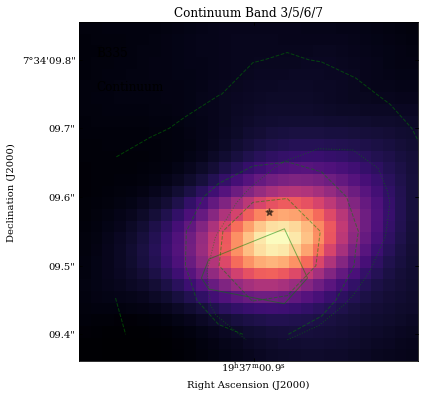

In [123]:
text_color = 'black'
Molecule = 'Continuum'

hdu = load_cutout(file_cont_band6)
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='magma').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_so=False, contour_cont=True)

#cax = ax.inset_axes(col_pos)
#cbar = plt.colorbar(im, cax=cax, label=r'(Jy/beam)', orientation='horizontal')
#cbar.set_ticks([-1,0,1])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'Continuum', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
plt.tight_layout()
plt.title('Continuum Band 3/5/6/7')
#fig.savefig('Documents/Figures/B335_SO_Vlsr.png', dpi=200)

# SO Vlsr

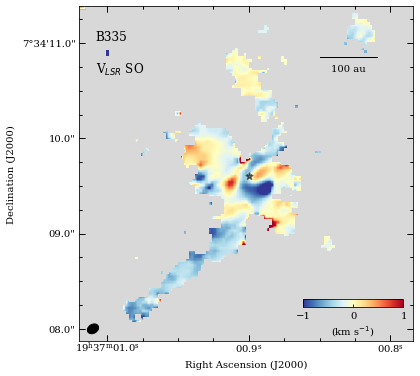

In [373]:
text_color = 'black'
Molecule = 'SO'

hdu = load_cutout('Documents/SO/B335_SO_vlsr_3snr_HRA.fits')
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='RdYlBu_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data-vlsr, vmin = -1, vmax = 1, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_co = False, contour_cont=False, contour_so = False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([-1,0,1])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ SO', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)

#Center = SkyCoord("19h37m0.9s","7d34m9.6s")
#skypath = PathFromCenter(center=position, length = 1 * u.arcsec, angle = 10 * u.deg, width = 1)
#skypath.show_on_axis(ax, spacing=1, color='black')#, linestyle = 'dotted')




plt.tight_layout()

In [10]:
file_dv_SO_min_width_blue = 'Documents/SO/B335_SO_vlsr_5snr_min_width_blue.fits'
file_dv_SO_min_width_red = 'Documents/SO/B335_SO_vlsr_5snr_min_width_red.fits'
file_vc_SO_min_vel_blue = 'Documents/SO/B335_SO_vlsr_5snr_min_vel_blue.fits'
file_vc_SO_min_vel_red = 'Documents/SO/B335_SO_vlsr_5snr_min_vel_red.fits'

file_dv_SO_max_width_blue = 'Documents/SO/B335_SO_vlsr_5snr_max_width_blue.fits'
file_dv_SO_max_width_red = 'Documents/SO/B335_SO_vlsr_5snr_max_width_red.fits'
file_vc_SO_max_vel_blue = 'Documents/SO/B335_SO_vlsr_5snr_max_vel_blue.fits'
file_vc_SO_max_vel_red = 'Documents/SO/B335_SO_vlsr_5snr_max_vel_red.fits'

# SO Narrow component

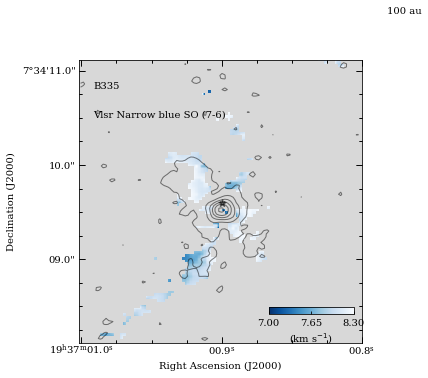

In [352]:
text_color = 'black'
Molecule = 'SO'

hdu = load_cutout(file_vc_SO_min_vel_blue)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Blues_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin = 7, vmax = 8.3, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_co = False, contour_cont=False, contour_so = True)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([7, 7.65 ,8.3])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'Vlsr Narrow blue SO (7-6)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)

#fig.savefig('Documents/Figures/SO_vlsr_blue.pdf', dpi=200)

plt.tight_layout()

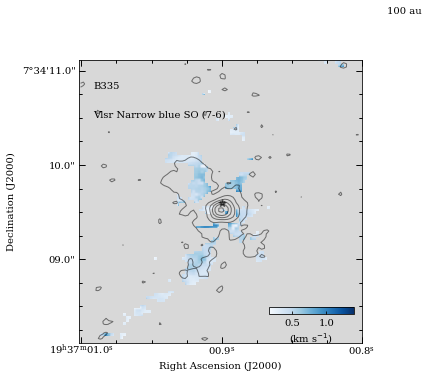

In [353]:
text_color = 'black'
Molecule = 'SO'

hdu = load_cutout(file_dv_SO_min_width_blue)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Blues').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmax = 1.4, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_co = False, contour_cont=False, contour_so = True)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([7, 7.65 ,8.3])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'Vlsr Narrow blue SO (7-6)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)

#fig.savefig('Documents/Figures/SO_vlsr_blue.pdf', dpi=200)

plt.tight_layout()

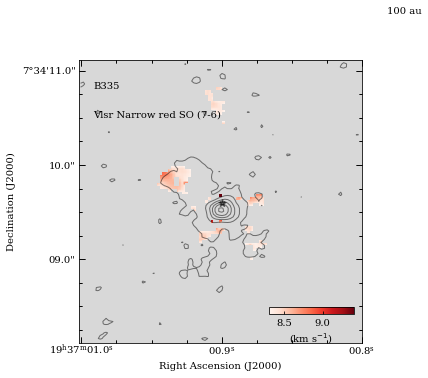

In [357]:
text_color = 'black'
Molecule = 'SO'

hdu = load_cutout(file_vc_SO_min_vel_red)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Reds').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin = 8.3, vmax = 9.4, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_co = False, contour_cont=False, contour_so = True)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([8.3, 8.85 ,9.4])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'Vlsr Narrow red SO (7-6)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)

#fig.savefig('Documents/Figures/SO_vlsr_red.pdf', dpi=200)

plt.tight_layout()

# SO intermediate component

# SO Broad component

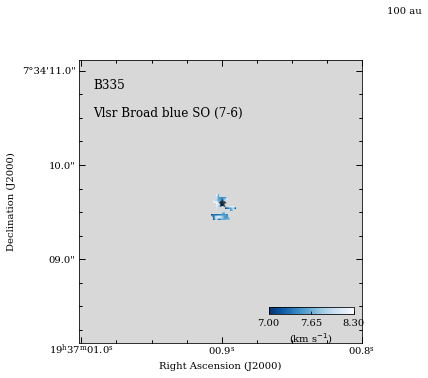

In [354]:
text_color = 'black'
Molecule = 'SO'

hdu = load_cutout(file_vc_SO_max_vel_blue)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Blues_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax1 = plt.subplot(projection=wcs)
im1 = ax1.imshow(hdu.data, vmin = 7, vmax = 8.3, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax1, hdu, label_col=text_color, contour_co = False, contour_cont=False, contour_so = False)

cax = ax1.inset_axes(col_pos)
cbar = plt.colorbar(im1, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([7, 7.65 ,8.3])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax1.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'Vlsr Broad blue SO (7-6)', transform=ax1.transAxes, 
                horizontalalignment='left', color=text_color, size=12)

#fig.savefig('Documents/Figures/SO_broad_vlsr_blue.pdf', dpi=200)

plt.tight_layout()

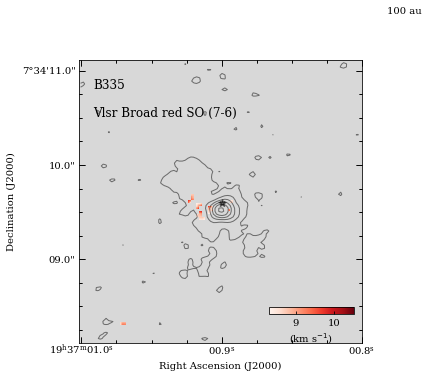

In [355]:
text_color = 'black'
Molecule = 'SO'

hdu = load_cutout(file_vc_SO_max_vel_red)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Reds').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax1 = plt.subplot(projection=wcs)
im1 = ax1.imshow(hdu.data, vmin = 8.3, vmax = 10.5, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax1, hdu, label_col=text_color, contour_co = False, contour_cont=False, contour_so = True)

cax = ax1.inset_axes(col_pos)
cbar = plt.colorbar(im1, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([8.3, 8.85, 9.4])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax1.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'Vlsr Broad red SO (7-6)', transform=ax1.transAxes, 
                horizontalalignment='left', color=text_color, size=12)

#fig.savefig('Documents/Figures/SO_broad_vlsr_red.pdf', dpi=200)

plt.tight_layout()

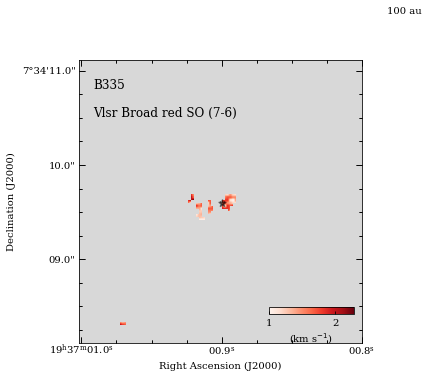

In [318]:
text_color = 'black'
Molecule = 'SO'

hdu = load_cutout(file_dv_SO_max_width_red)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Reds').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax1 = plt.subplot(projection=wcs)
im1 = ax1.imshow(hdu.data, vmin = 1,cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax1, hdu, label_col=text_color, contour_co = False, contour_cont=False, contour_so = False)

cax = ax1.inset_axes(col_pos)
cbar = plt.colorbar(im1, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([8.3, 8.85, 9.4])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax1.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'Vlsr Broad red SO (7-6)', transform=ax1.transAxes, 
                horizontalalignment='left', color=text_color, size=12)

#fig.savefig('Documents/Figures/SO_broad_vlsr_red.pdf', dpi=200)

plt.tight_layout()

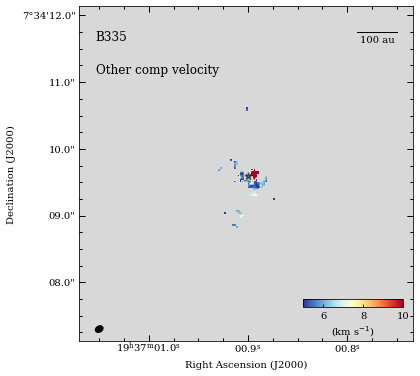

In [68]:
file_dv_SO_other_width = 'Documents/SO/B335_SO_vlsr_5snr_other_width.fits'
file_vc_SO_other_vel = 'Documents/SO/B335_SO_vlsr_5snr_other_vel.fits'
file_Image_other = 'Documents/SO/B335_SO_howmanycomp_other.fits'

text_color = 'black'
Molecule = 'SO'



#fig.savefig('Documents/Figures/B335_SO_broad_width.pdf', dpi=200)

hdu = load_cutout(file_vc_SO_other_vel)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='RdYlBu_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax1 = plt.subplot(projection=wcs)
im1 = ax1.imshow(hdu.data, vmin = 5, vmax = 10, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax1, hdu, label_col=text_color, contour_co = False, contour_cont=False, contour_so = False)

cax = ax1.inset_axes(col_pos)
cbar = plt.colorbar(im1, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([7,8,9,10])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax1.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'Other comp velocity', transform=ax1.transAxes, 
                horizontalalignment='left', color=text_color, size=12)

#fig.savefig('Documents/Figures/B335_SO_broad_vlsr.pdf', dpi=200)

plt.tight_layout()

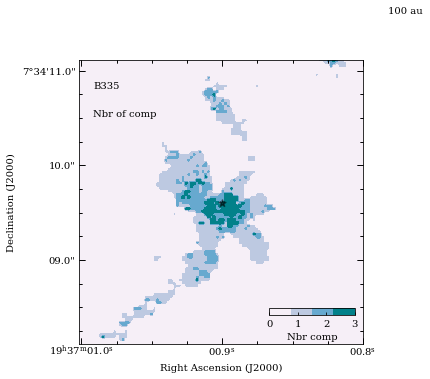

In [360]:
file_Image = 'Documents/SO/B335_SO_howmanycomp.fits'
file_Image_max = 'Documents/SO/B335_SO_howmanycomp_broad.fits'

text_color = 'black'
Molecule = 'SO'

hdu = load_cutout(file_Image)
wcs = WCS(hdu.header)


cmap = plt.get_cmap(name='Greys_r').copy()
cmap.set_bad(color='0.85')

cmaplst = ['#f6eff7', '#bdc9e1', '#67a9cf', '#02818a']  # stolen from colorbrewer2
lcmap = ListedColormap(cmaplst)

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=lcmap, vmin = 0, vmax = 3, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_so=False)

cax = ax.inset_axes(col_pos)

cbar = plt.colorbar(im, cax=cax, label=r'Nbr comp', orientation='horizontal')
cbar.set_ticks([0, 1, 2, 3])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'Nbr of comp', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)



plt.tight_layout()

#fig.savefig('Documents/Figures/SO_Comp.pdf', dpi=200, bbox_inches='tight')

# SO TdV

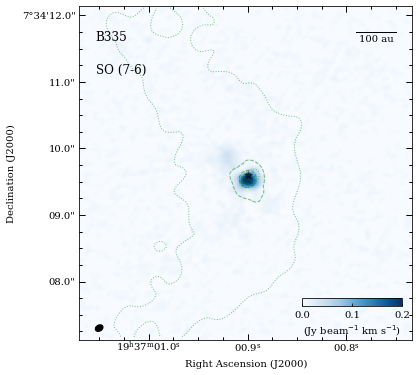

In [17]:
text_color = 'black'
Molecule = 'SO'

hdu = load_cutout(file_TdV_SO)
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='Blues').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=cmap, vmin = 0, vmax = 0.2, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_cont=True)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(Jy beam$^{-1}$ km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([0, 0.1, 0.2, 0.3])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'SO (7-6)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
plt.tight_layout()
#fig.savefig('figs/NGC1333_SiO_TdV.pdf', dpi=200)

# SO dv

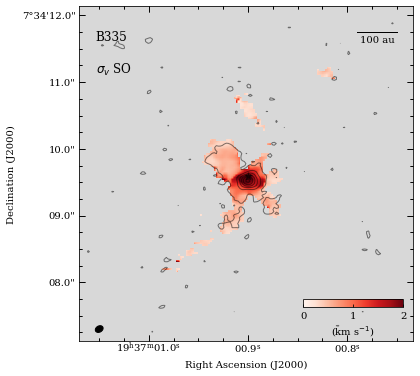

In [18]:
text_color = 'black'
Molecule = 'SO'

hdu = load_cutout(file_dv_SO)
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='Reds').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=cmap, vmin = 0, vmax = 2, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_so=True)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([0, 1, 2])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'$\sigma_{v}$ SO', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
plt.tight_layout()
#fig.savefig('figs/NGC1333_N2Hp_dv_SiO.pdf', dpi=200)

# $N_2H+$ Vlsr

    Header size is not multiple of 2880: 1
There may be extra bytes after the last HDU or the file is corrupted. [astropy.io.fits.hdu.hdulist]
/var/folders/6m/n1jjf0yj4x1635jmn9zkj949q6vf84/T/ipykernel_29586/3742240142.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


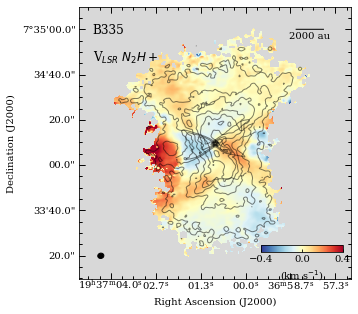

In [19]:
text_color = 'black'
Molecule = 'N2Hp'

hdu = load_cutout(file_vc_N2Hp)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='RdYlBu_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data- vlsr, vmin = -0.4, vmax= 0.4, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_n2hp=True, contour_cont = False, contour_co_large=True, contour_so = False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([-0.4,0,0.4])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ $N_2H+$', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)

fig.savefig('Documents/Figures/B335_N2Hp_Vlsr.png', dpi=200)

plt.tight_layout()


In [20]:
file_dv_N2Hp_width_red = 'Documents/B335/B335_N2Hp_3snr_width_red.fits'
file_dv_N2Hp_width_blue = 'Documents/B335/B335_N2Hp_3snr_width_blue.fits'
file_vc_N2Hp_vlsr_red = 'Documents/B335/B335_N2Hp_vlsr_3snr_vel_red.fits'
file_vc_N2Hp_vlsr_blue = 'Documents/B335/B335_N2Hp_vlsr_3snr_vel_blue.fits'
file_vc_N2Hp_vlsr_other = 'Documents/B335/B335_N2Hp_vlsr_3snr_vel_other.fits'
file_dv_N2Hp_width_other = 'Documents/B335/B335_N2Hp_3snr_width_other.fits'

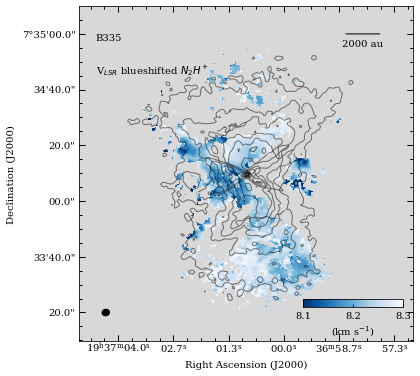

In [319]:
text_color = 'black'
Molecule = 'N2Hp'

hdu = load_cutout(file_vc_N2Hp_vlsr_blue)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Blues_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin=8.1, vmax = 8.3, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_n2hp=True, contour_co_large=True, contour_so = False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([8.1, 8.2, 8.3])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ blueshifted $N_2H^+$', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)


#fig.savefig('Documents/Figures/B335_N2Hp_Vlsr_blue.png', dpi=200)

plt.tight_layout()

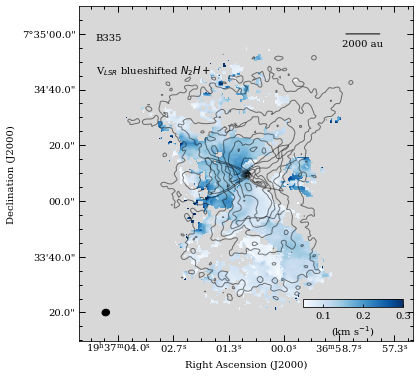

In [322]:
text_color = 'black'
Molecule = 'N2Hp'

hdu = load_cutout(file_dv_N2Hp_width_blue)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Blues').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmax = 0.3,cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_n2hp=True, contour_co_large=True, contour_so = False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([8.1, 8.2, 8.3])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ blueshifted $N_2H+$', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)


#fig.savefig('Documents/Figures/B335_N2Hp_Vlsr_blue.png', dpi=200)

plt.tight_layout()

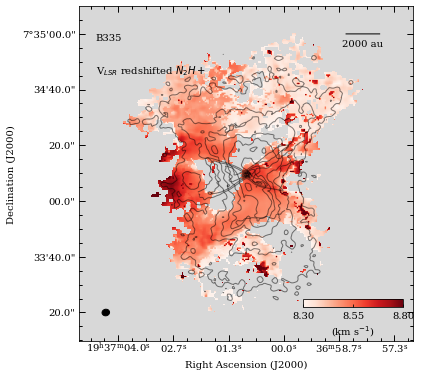

In [320]:
text_color = 'black'
Molecule = 'N2Hp'

hdu = load_cutout(file_vc_N2Hp_vlsr_red)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Reds').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin=8.3, vmax = 8.8, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_n2hp=True, contour_co_large=True, contour_so = False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([8.3, 8.55, 8.8])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ redshifted $N_2H+$', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)


#fig.savefig('Documents/Figures/B335_N2Hp_Vlsr_red.png', dpi=200)

plt.tight_layout()

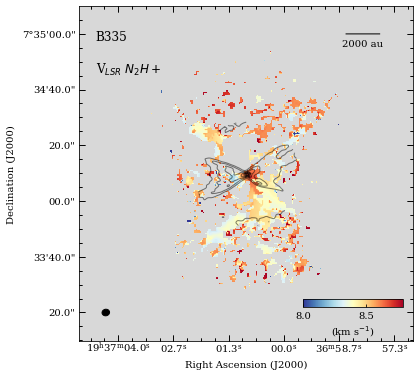

In [321]:
text_color = 'black'
Molecule = 'N2Hp'

hdu = load_cutout(file_vc_N2Hp_vlsr_other)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='RdYlBu_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_n2hp=False, contour_co_large=True, contour_so = False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([8.3, 8.55, 8.8])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ $N_2H+$', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)


#fig.savefig('Documents/Figures/B335_N2Hp_Vlsr_red.png', dpi=200)

plt.tight_layout()

# $N_2H+$ TdV

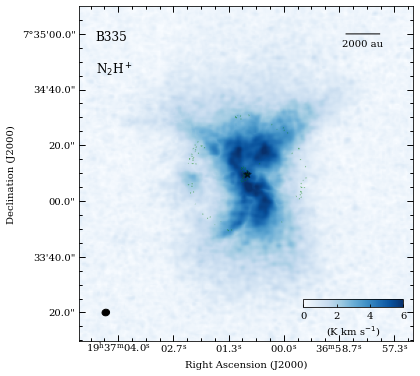

In [24]:
text_color = 'black'
Molecule = 'N2Hp'

hdu = load_cutout(file_TdV_N2Hp)
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='Blues').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin = 0, vmax = 6, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_cont=True)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(K km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([0, 2, 4, 6])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'N$_2$H$^+$', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
plt.tight_layout()
#fig.savefig('figs/NGC1333_N2Hp_TdV.pdf', dpi=200)


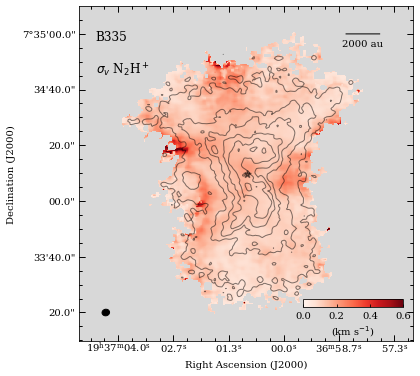

In [25]:
text_color = 'black'

hdu = load_cutout(file_dv_N2Hp)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Reds').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin = 0, vmax = 0.6, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_n2hp=True)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([0.2, 0.6, 1.0])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'$\sigma_{v}$ N$_2$H$^+$', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
plt.tight_layout()
#fig.savefig('Documents/Figures/B335_N2Hp_dv.png', dpi=200)

# CO TdV

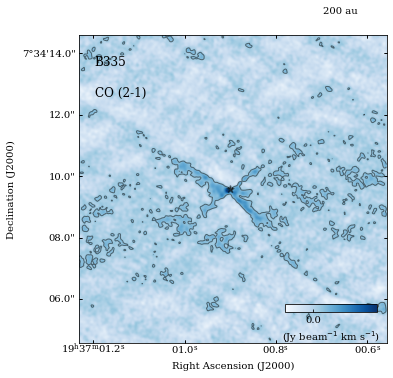

In [26]:
text_color = 'black'
Molecule = 'C18O'

hdu = load_cutout(file_TdV_CO)
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='Blues').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_co=True)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(Jy beam$^{-1}$ km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([0, 0.1, 0.2, 0.3])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'CO (2-1)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
plt.tight_layout()
#fig.savefig('figs/NGC1333_SiO_TdV.pdf', dpi=200)

# C18O TdV

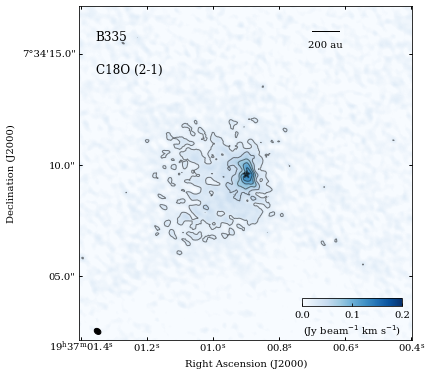

In [27]:
text_color = 'black'
Molecule = 'C18O'

hdu = load_cutout(file_TdV_C18O)
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='Blues').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin = 0, vmax = 0.2, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_C18O=True)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(Jy beam$^{-1}$ km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([0, 0.1])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'C18O (2-1)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
plt.tight_layout()
#fig.savefig('figs/NGC1333_SiO_TdV.pdf', dpi=200)

# C18O Vlsr

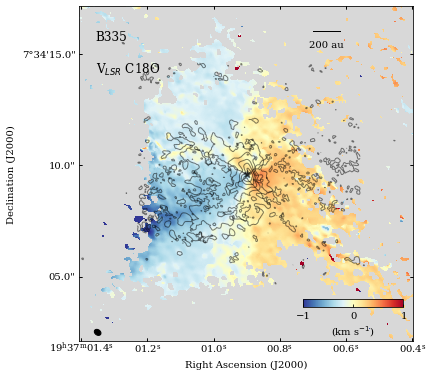

In [28]:
text_color = 'black'
Molecule = 'C18O'

hdu = load_cutout(file_vc_C18O)
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='RdYlBu_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data - vlsr, vmin=-1, vmax=1, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_C18O = True, contour_co=True)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([-1,0,1])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ C18O', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)

Coords_B335 = SkyCoord("19h37m0.9s","7d34m9.6s")
#Coords_B335 = SkyCoord("19h37m0.9s","7d34m9.49s")
Coords_end = SkyCoord("19h37m0.95s","7d34m9.75s")

plt.tight_layout()

In [29]:
file_dv_C18O_width_red = 'Documents/C18O/B335_C18O_vlsr_5snr_width_red.fits'
file_dv_C18O_width_blue = 'Documents/C18O/B335_C18O_vlsr_5snr_width_blue.fits'
file_vc_C18O_vlsr_red = 'Documents/C18O/B335_C18O_vlsr_5snr_vel_red.fits'
file_vc_C18O_vlsr_blue = 'Documents/C18O/B335_C18O_vlsr_5snr_vel_blue.fits'
file_vc_C18O_vlsr_very_blue = 'Documents/C18O/B335_C18O_vlsr_5snr_vel_very_blue.fits'
file_dv_C18O_width_very_blue = 'Documents/C18O/B335_C18O_vlsr_5snr_width_very_blue.fits'

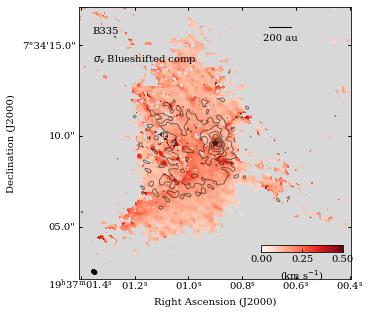

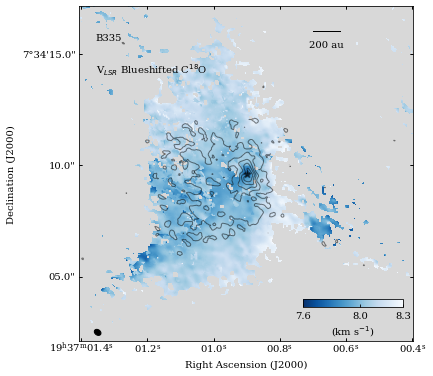

In [336]:
text_color = 'black'
Molecule = 'C18O'

hdu = load_cutout(file_dv_C18O_width_blue)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Reds').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=cmap, vmin = 0, vmax = 0.5, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_C18O=True)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([0, 0.25, 0.5])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'$\sigma_{v}$ Blueshifted comp', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)

#fig.savefig('Documents/Figures/C18O_width_blue.pdf', dpi=200)

hdu = load_cutout(file_vc_C18O_vlsr_blue)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Blues_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin = 7.6, vmax = 8.3, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_C18O = True, contour_co=False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([7.6,8,8.3])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ Blueshifted C$^{18}$O', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)

#fig.savefig('Documents/Figures/C18O_Vlsr_blue.pdf', dpi=200)


plt.tight_layout()

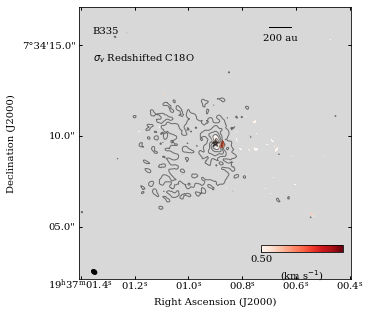

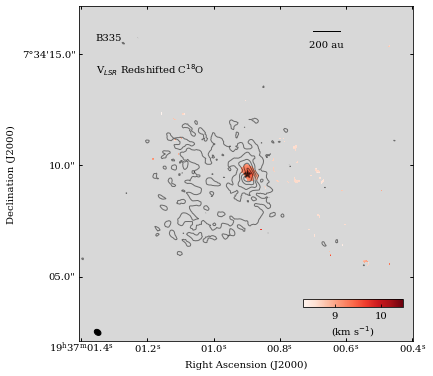

In [350]:
text_color = 'black'
Molecule = 'C18O'

hdu = load_cutout(file_dv_C18O_width_very_blue)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Reds').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=cmap, vmin = 0.5, vmax = 2, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_C18O=True)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([0, 0.25, 0.5])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'$\sigma_{v}$ Redshifted C18O', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)

#fig.savefig('Documents/Figures/C18O_width_red.pdf', dpi=200)

hdu = load_cutout(file_vc_C18O_vlsr_red)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Reds').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin = 8.3, vmax = 10.5, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_C18O = True, contour_co=False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([8.3, 8.7, 9])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ Redshifted C$^{18}$O', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)

#fig.savefig('Documents/Figures/C18O_Vlsr_red.pdf', dpi=200)

plt.tight_layout()

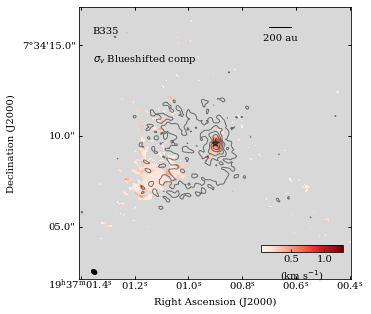

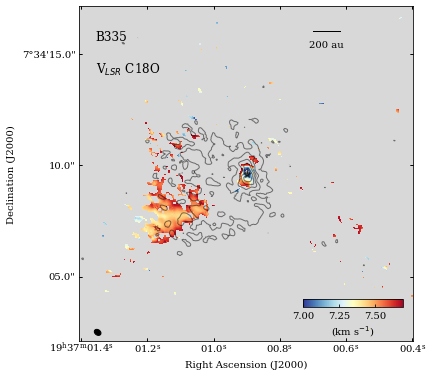

In [32]:
text_color = 'black'
Molecule = 'C18O'

hdu = load_cutout(file_dv_C18O_width_very_blue)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Reds').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_C18O=True)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([0, 0.25, 0.5])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'$\sigma_{v}$ Blueshifted comp', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)



hdu = load_cutout(file_vc_C18O_vlsr_very_blue)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='RdYlBu_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin = 7, vmax = 7.7, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_C18O = True, contour_co=False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([8.4, 8.7, 9])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ C18O', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)


plt.tight_layout()

# H13CO 3-2 Vlsr

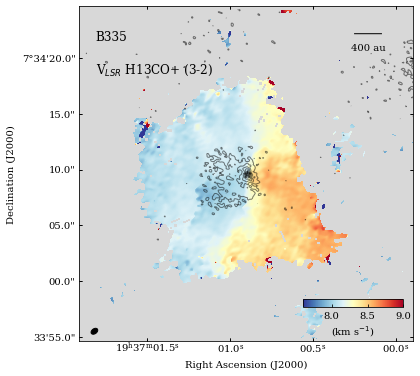

In [33]:
text_color = 'black'
Molecule = 'H13CO'

hdu = load_cutout(file_vc_H13CO)
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='RdYlBu_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin = 7.6, vmax =9, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_H13CO = False, contour_C18O = True, contour_cont = False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([-1,0,1])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ H13CO+ (3-2)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)

#skypath = PathFromCenter(center=position, length = 10 * u.arcsec, angle = 0* u.deg)
#skypath.show_on_axis(ax, spacing=1, color='black')#, linestyle = 'dotted')

plt.tight_layout()
#fig.savefig('Documents/Figures/B335_SO_Vlsr.png', dpi=200)

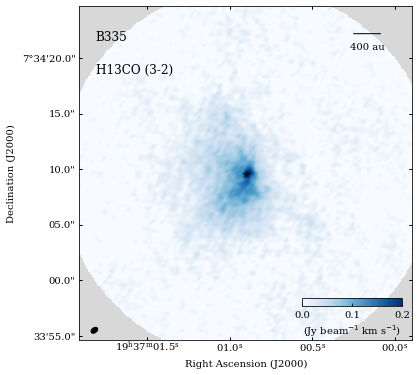

In [148]:
text_color = 'black'
Molecule = 'H13CO'

hdu = load_cutout(file_TdV_H13CO)
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='Blues').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=cmap, vmin = 0, vmax = 0.2, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_cont=False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(Jy beam$^{-1}$ km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([0, 0.1, 0.2, 0.3])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'H13CO (3-2)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
plt.tight_layout()
#fig.savefig('figs/NGC1333_SiO_TdV.pdf', dpi=200)

# H13CO 3-2 dv

# CS Vlsr

In [182]:
file_dv_CS_min_width = 'Documents/CS/B335_CS_vlsr_5snr_min_width.fits'
file_dv_CS_max_width = 'Documents/CS/B335_CS_vlsr_5snr_max_width.fits'
file_vc_CS_min_vel = 'Documents/CS/B335_CS_vlsr_5snr_min_vel.fits'
file_vc_CS_max_vel = 'Documents/CS/B335_CS_vlsr_5snr_max_vel.fits'
file_vc_CS_other_vel = 'Documents/CS/B335_CS_vlsr_5snr_other_vel.fits'

file_dv_CS_min_width_blue = 'Documents/CS/B335_CS_vlsr_5snr_min_width_blue.fits'
file_dv_CS_min_width_red = 'Documents/CS/B335_CS_vlsr_5snr_min_width_red.fits'
file_vc_CS_min_vel_blue = 'Documents/CS/B335_CS_vlsr_5snr_min_vel_blue.fits'
file_vc_CS_min_vel_red = 'Documents/CS/B335_CS_vlsr_5snr_min_vel_red.fits'

file_dv_CS_max_width_blue = 'Documents/CS/B335_CS_vlsr_5snr_max_width_blue.fits'
file_dv_CS_max_width_red = 'Documents/CS/B335_CS_vlsr_5snr_max_width_red.fits'
file_vc_CS_max_vel_blue = 'Documents/CS/B335_CS_vlsr_5snr_max_vel_blue.fits'
file_vc_CS_max_vel_red = 'Documents/CS/B335_CS_vlsr_5snr_max_vel_red.fits'

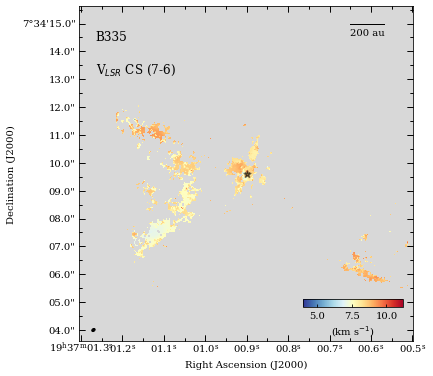

In [167]:
text_color = 'black'
Molecule = 'CS'

hdu = load_cutout(file_vc_CS_max_vel)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='RdYlBu_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_cs = False, contour_C18O = False, contour_cont = False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([-1,0,1])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ CS (7-6)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)


plt.tight_layout()

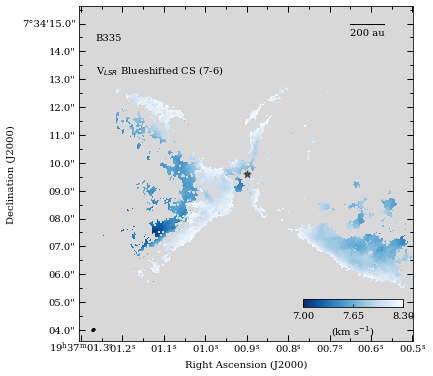

In [203]:
text_color = 'black'
Molecule = 'CS'

hdu = load_cutout(file_vc_CS_min_vel_blue)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Blues_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin = 7, vmax = 8.3, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_cs = False, contour_co = False, contour_cont = False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([7, 7.65, 8.3])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ Blueshifted CS (7-6)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)

#fig.savefig('Documents/Figures/CS_vlsr_blueshifted.pdf', dpi=200)

plt.tight_layout()

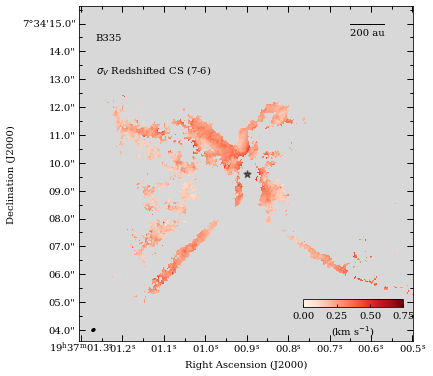

In [204]:
text_color = 'black'
Molecule = 'CS'

hdu = load_cutout(file_dv_CS_min_width_red)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Reds').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin = 0, vmax = 0.75, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_cs = False, contour_co = False, contour_cont = False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([7, 7.65, 8.3])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'$\sigma_V$ Redshifted CS (7-6)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)

#fig.savefig('Documents/Figures/CS_vlsr_blueshifted.pdf', dpi=200)

plt.tight_layout()

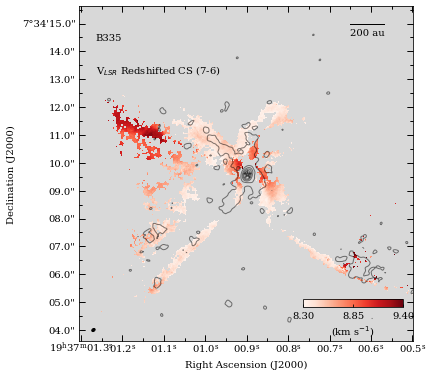

In [361]:
text_color = 'black'
Molecule = 'CS'

hdu = load_cutout(file_vc_CS_min_vel_red)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Reds').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin = 8.3, vmax = 9.4, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_cs = True, contour_co = False, contour_cont = False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([8.3, 8.85, 9.4])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ Redshifted CS (7-6)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)

#fig.savefig('Documents/Figures/CS_vlsr_redshifted_co_contour.pdf', dpi=200)

plt.tight_layout()


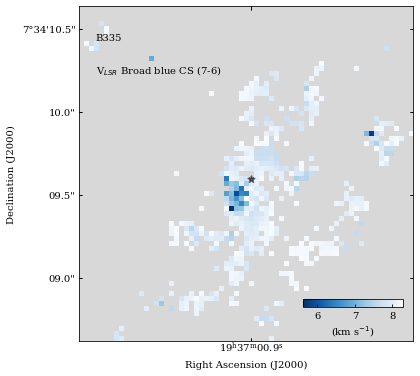

In [364]:
text_color = 'black'
Molecule = 'CS_broad'

hdu = load_cutout(file_vc_CS_max_vel_blue)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Blues_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_cs = False, contour_C18O = False, contour_cont = False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([7,7.65,8.3])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ Broad blue CS (7-6)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)


plt.tight_layout()

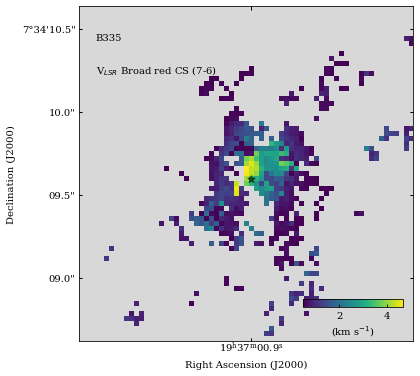

In [367]:
text_color = 'black'
Molecule = 'CS_broad'

hdu = load_cutout(file_dv_CS_max_width_red)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='viridis').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_cs = False, contour_C18O = False, contour_cont = False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([8.3, 8.85, 9.4])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ Broad red CS (7-6)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)


plt.tight_layout()

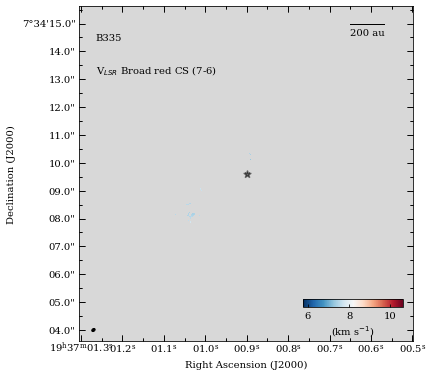

In [188]:
text_color = 'black'
Molecule = 'CS'

hdu = load_cutout(file_vc_CS_other_vel)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='RdBu_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_cs = False, contour_C18O = False, contour_cont = False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([8.3, 8.85, 9.4])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ Broad red CS (7-6)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)


plt.tight_layout()

# CS TdV

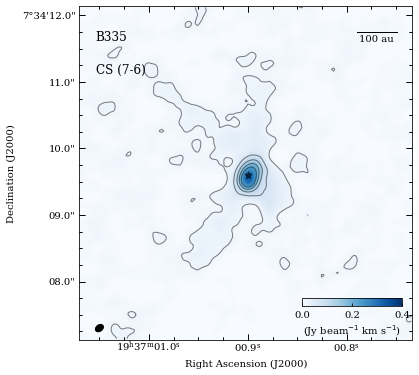

In [41]:
text_color = 'black'
Molecule = 'SO'

hdu = load_cutout(file_TdV_CS)
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='Blues').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=cmap, vmin = 0, vmax = 0.4, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_cs=True)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(Jy beam$^{-1}$ km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([0, 0.1, 0.2, 0.3])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'CS (7-6)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
plt.tight_layout()
#fig.savefig('figs/NGC1333_SiO_TdV.pdf', dpi=200)

# Large Scale Map

    Header size is not multiple of 2880: 1
There may be extra bytes after the last HDU or the file is corrupted. [astropy.io.fits.hdu.hdulist]
/var/folders/6m/n1jjf0yj4x1635jmn9zkj949q6vf84/T/ipykernel_29586/3253757387.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


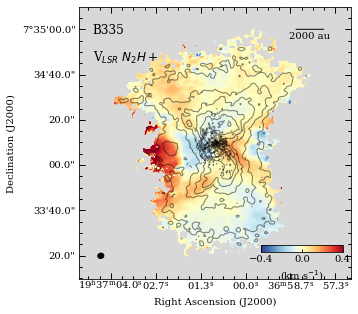

In [42]:
text_color = 'black'
Molecule = 'N2Hp'

hdu = load_cutout(file_vc_N2Hp)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='RdYlBu_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data - vlsr, vmin = -0.4, vmax= 0.4, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_n2hp=True, contour_H13CO = True, contour_co=True, contour_so = False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([-0.4,0,0.4])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ $N_2H+$', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)

fig.savefig('Documents/Figures/B335_N2Hp_Vlsr.png', dpi=200)

plt.tight_layout()

# Medium Scale

/var/folders/6m/n1jjf0yj4x1635jmn9zkj949q6vf84/T/ipykernel_29586/3334382608.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


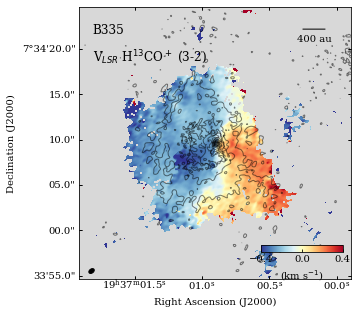

In [43]:
text_color = 'black'
Molecule = 'H13CO'

hdu = load_cutout(file_vc_H13CO)
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='RdYlBu_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data-vlsr, vmin = -0.4, vmax =0.4, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_so = False ,contour_H13CO = True, contour_C18O = True, contour_cont = False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([-0.4,0,0.4])


fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ H$^{13}$CO$^+$ (3-2)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)

#skypath = PathFromCenter(center=position, length = 10 * u.arcsec, angle = 0* u.deg)
#skypath.show_on_axis(ax, spacing=1, color='black')#, linestyle = 'dotted')
fig.savefig('Documents/Figures/B335_H13CO_32_Vlsr.png', dpi=200)

plt.tight_layout()
#fig.savefig('Documents/Figures/B335_SO_Vlsr.png', dpi=200)

#plot H13CO zoomed in + overlay SO contours, show line width of H13CO to compare with SO (2 subplots)

# Medium Scale

/var/folders/6m/n1jjf0yj4x1635jmn9zkj949q6vf84/T/ipykernel_29586/402549335.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


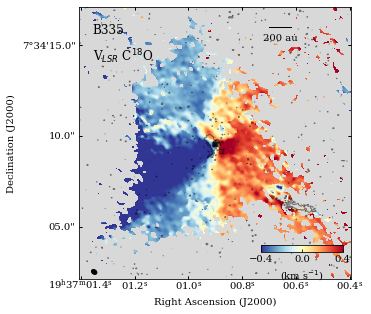

In [44]:
text_color = 'black'
Molecule = 'C18O'

hdu = load_cutout(file_vc_C18O)
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='RdYlBu_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data - vlsr, vmin=-0.4, vmax=0.4, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_cs=False, contour_so = True, contour_co=False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([-0.4,0,0.4])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ C$^{18}$O', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)

fig.savefig('Documents/Figures/B335_C18O_Vlsr.png', dpi=200)

plt.tight_layout()

# Small scale

/var/folders/6m/n1jjf0yj4x1635jmn9zkj949q6vf84/T/ipykernel_29586/1864345369.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


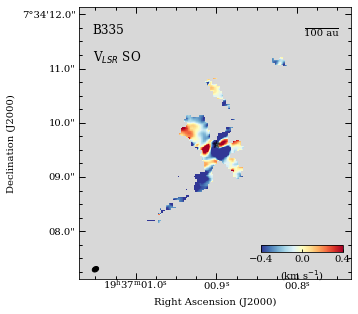

In [45]:
text_color = 'black'
Molecule = 'SO'

hdu = load_cutout(file_vc_SO)
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='RdYlBu_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data - vlsr, vmin=-0.4, vmax=0.4, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_cs = False, contour_cont=False, contour_so = False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([-0.4,0,0.4])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ SO', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)

#Center = SkyCoord("19h37m0.888s","7d34m9.55s")
#skypath = PathFromCenter(center=Center, length = 0.5 * u.arcsec, angle = 20 * u.deg, width = 1) #more than 1 width
#skypath.show_on_axis(ax, spacing=1, color='black')#, linestyle = 'dotted')

fig.savefig('Documents/Figures/B335_SO_Vlsr.png', dpi=200)

plt.tight_layout()

In [46]:
file_dv_H13CO_width_blue = 'Documents/H13CO/B335_H13CO_32_vlsr_5snr_width_blue_3comp.fits'
file_vc_H13CO_vlsr_blue = 'Documents/H13CO/B335_H13CO_32_vlsr_5snr_vel_blue_3comp.fits'

file_vc_H13CO_vlsr_very_blue = 'Documents/H13CO/B335_H13CO_32_vlsr_5snr_vel_very_blue_3comp.fits'
file_dv_H13CO_width_very_blue = 'Documents/H13CO/B335_H13CO_32_vlsr_5snr_width_very_blue_3comp.fits'

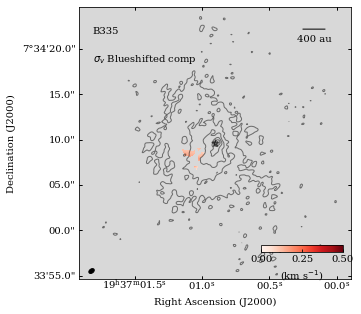

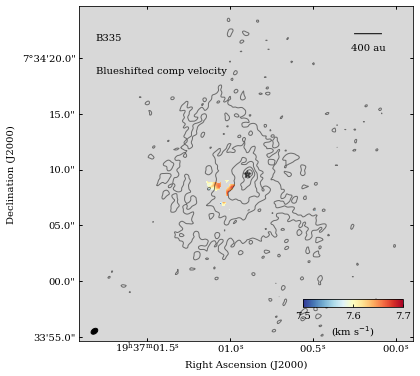

In [47]:
text_color = 'black'
Molecule = 'H13CO'
#"""

hdu = load_cutout(file_dv_H13CO_width_very_blue)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Reds').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=cmap, vmin = 0, vmax = 0.5, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_H13CO=True)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([0, 0.25, 0.5])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'$\sigma_{v}$ Blueshifted comp', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)

#fig.savefig('Documents/Figures/B335_H13CO_blueshifted_width.pdf', dpi=200)


#"""
hdu = load_cutout(file_vc_H13CO_vlsr_very_blue)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='RdYlBu_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin = 7.5, vmax = 7.7, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_co=False, contour_H13CO = True, contour_cont=False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([7.8, 8.15, 8.5])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'Blueshifted comp velocity', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)

plt.tight_layout()

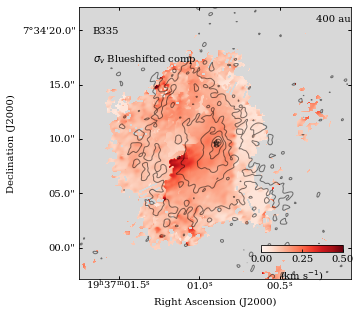

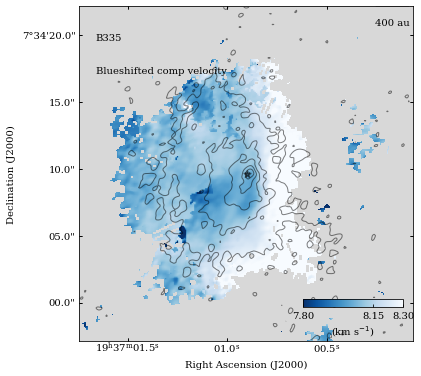

In [329]:

text_color = 'black'
Molecule = 'H13CO'
#"""

hdu = load_cutout(file_dv_H13CO_width_blue)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Reds').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=cmap, vmin = 0, vmax = 0.5, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_H13CO=True)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([0, 0.25, 0.5])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'$\sigma_{v}$ Blueshifted comp', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)

#fig.savefig('Documents/Figures/B335_H13CO_blueshifted_width.pdf', dpi=200)


#"""
hdu = load_cutout(file_vc_H13CO_vlsr_blue)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Blues_r').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin = 7.8, vmax = 8.3, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_H13CO = True, contour_cont=False, contour_co=False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([7.8, 8.15, 8.3])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'Blueshifted comp velocity', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=10)

#fig.savefig('Documents/Figures/B335_H13CO_blueshifted_vlsr.pdf', dpi=200)

plt.tight_layout()


In [49]:
file_dv_H13CO_width_red = 'Documents/H13CO/B335_H13CO_32_vlsr_5snr_width_red_3comp.fits'
file_vc_H13CO_vlsr_red = 'Documents/H13CO/B335_H13CO_32_vlsr_5snr_vel_red_3comp.fits'

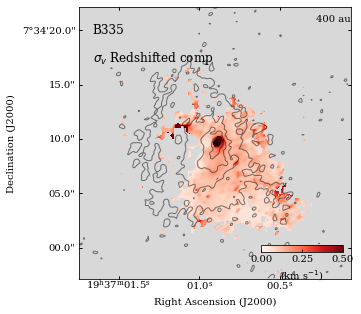

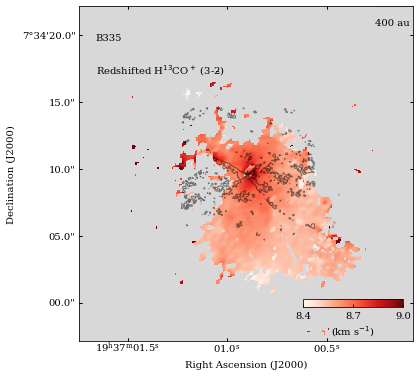

In [157]:
text_color = 'black'
Molecule = 'H13CO'

#"""
hdu = load_cutout(file_dv_H13CO_width_red)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Reds').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax1 = plt.subplot(projection=wcs)
im1 = ax1.imshow(hdu.data, cmap=cmap, vmin = 0, vmax = 0.5, origin='lower')

plot_setup_noema_wcsaxes(ax1, hdu, label_col=text_color, contour_H13CO=True)

cax = ax1.inset_axes(col_pos)
cbar = plt.colorbar(im1, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([0, 0.25, 0.5])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax1.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'$\sigma_{v}$ Redshifted comp', transform=ax1.transAxes, 
                horizontalalignment='left', color=text_color, size=12)

#fig.savefig('Documents/Figures/B335_H13CO_redshifted_width.pdf', dpi=200)

#"""
hdu = load_cutout(file_vc_H13CO_vlsr_red)
wcs = WCS(hdu.header)

bad = hdu.data == 0.0
hdu.data[bad] = np.nan

cmap = plt.get_cmap(name='Reds').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax1 = plt.subplot(projection=wcs)
im1 = ax1.imshow(hdu.data, vmin = 8.4, vmax = 9, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax1, hdu, label_col=text_color, contour_H13CO = False, contour_co=True, contour_so = False)

cax = ax1.inset_axes(col_pos)
cbar = plt.colorbar(im1, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
cbar.set_ticks([8.4,8.7,9])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax1.transAxes, 
                horizontalalignment='left', color=text_color, size=10)
fig.text(xpos_lab2, ypos_lab2, r'Redshifted H$^{13}$CO$^+$ (3-2)', transform=ax1.transAxes, 
                horizontalalignment='left', color=text_color, size=10)

#fig.savefig('Documents/Figures/B335_H13CO_redshifted_vlsr.pdf', dpi=200)

plt.tight_layout()


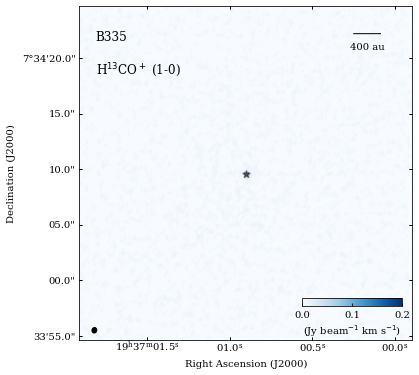

In [51]:
text_color = 'black'
Molecule = 'H13CO'

hdu = load_cutout('Documents/H13CO/B335_H13CO_10_mom0.fits')
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='Blues').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, cmap=cmap, vmin = 0, vmax = 0.2, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_cs=False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(Jy beam$^{-1}$ km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([0, 0.1, 0.2, 0.3])

fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'H$^{13}$CO$^+$ (1-0)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
plt.tight_layout()
#fig.savefig('figs/NGC1333_SiO_TdV.pdf', dpi=200)

# Line width comparison between H$^{13}$CO$^+$ and SO

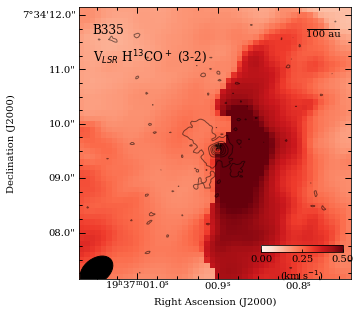

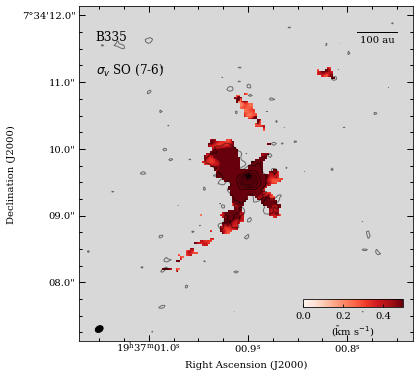

In [52]:
text_color = 'black'
Molecule = 'SO'

hdu = load_cutout(file_dv_H13CO)
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='Reds').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax = plt.subplot(projection=wcs)
im = ax.imshow(hdu.data, vmin = 0, vmax = 0.5, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax, hdu, label_col=text_color, contour_so = True,contour_H13CO = False, contour_C18O = False, contour_cont = False)

cax = ax.inset_axes(col_pos)
cbar = plt.colorbar(im, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([0,1,2])


fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'V$_{LSR}$ H$^{13}$CO$^+$ (3-2)', transform=ax.transAxes, 
                horizontalalignment='left', color=text_color, size=12)



hdu = load_cutout(file_dv_SO)
wcs = WCS(hdu.header)

cmap = plt.get_cmap(name='Reds').copy()
cmap.set_bad(color='0.85')

fig = plt.figure(figsize=my_figsize)
ax1 = plt.subplot(projection=wcs)
im1 = ax1.imshow(hdu.data, vmin=0, vmax=0.5, cmap=cmap, origin='lower')

plot_setup_noema_wcsaxes(ax1, hdu, label_col=text_color, contour_so = True,contour_H13CO = False, contour_C18O = False, contour_cont = False)

cax = ax1.inset_axes(col_pos)
cbar = plt.colorbar(im1, cax=cax, label=r'(km s$^{-1}$)', orientation='horizontal')
#cbar.set_ticks([0,1,2])


fig.text(xpos_lab1, ypos_lab1, 'B335', transform=ax1.transAxes, 
                horizontalalignment='left', color=text_color, size=12)
fig.text(xpos_lab2, ypos_lab2, r'$\sigma_{v}$ SO (7-6)', transform=ax1.transAxes, 
                horizontalalignment='left', color=text_color, size=12)



plt.tight_layout()
#fig.savefig('Documents/Figures/B335_SO_Vlsr.png', dpi=200)

#plot H13CO zoomed in + overlay SO contours, show line width of H13CO to compare with SO (2 subplots)